# Assignment 2. Diabetes Diagnosis

The assignment is to develop a classifier diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

The datasets consists of several medical predictor variables and one target variable, `Outcome`. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

First, let's load the data. The file named `diabetes_train.csv` is located in the same folder.

In [2]:
import pandas as pd

df = pd.read_csv('diabetes_train.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
693,7,129,68,49,125,38.5,0.439,43,1
694,2,90,60,0,0,23.5,0.191,25,0
695,7,142,90,24,480,30.4,0.128,43,1
696,3,169,74,19,125,29.9,0.268,31,1


Define `X` and `y`. Here, `X` and `y` refers to the input and output of our classification models.

In [3]:
X = df.iloc[:, :-1] # or, df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df.iloc[:, -1]  # or, df['Outcome']

## Problem 1. Check the ratio of positive samples

Check the ratio of positive samples? (here, positive means the target variable `Outcome==1`)

- Hint: Check the number of all samples ans positive samples.

In [4]:
X.shape, y.shape, y.sum() / len(y)

((698, 8), (698,), 0.3452722063037249)

## Problem 2. Train Classifiers

First, split the data into training and validation data. This is necessary to avoid overfitting. When spliting data, apply `stratify` option (why?).

In [5]:
from sklearn.model_selection import train_test_split

X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

Apply feature normalization so that all features are considered equal.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_trn)
X_trn_norm = scaler.transform(X_trn)
X_val_norm = scaler.transform(X_val)

Train decision tree, random forest, and logistic regression using the normalized training data. And check the training and validation performances of the model (e.g., accuracy, fscore, ...).

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    fscore = f1_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    print('Precision: {:.2f}%'.format(precision*100))
    print('Recall: {:.2f}%'.format(recall*100))
    print('Fscore: {:.2f}%'.format(fscore*100))
    
clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(X_trn_norm, y_trn)
y_val_pred = clf_dt.predict(X_val_norm)
print('Evaluation on Validation Set with Decision Tree:')
evaluate(y_val, y_val_pred)

clf_rf = RandomForestClassifier()
clf_rf.fit(X_trn_norm, y_trn)
y_val_pred = clf_rf.predict(X_val_norm)
print('Evaluation on Validation Set with Random Forest:')
evaluate(y_val, y_val_pred)

clf_lr = LogisticRegression()
clf_lr.fit(X_trn_norm, y_trn)
y_val_pred = clf_lr.predict(X_val_norm)
print('Evaluation on Validation Set with Logistic Regression:')
evaluate(y_val, y_val_pred)

print('trainining finished.')

Evaluation on Validation Set with Decision Tree:
Accuracy: 68.10%
Precision: 56.82%
Recall: 34.25%
Fscore: 42.74%
Evaluation on Validation Set with Random Forest:
Accuracy: 71.90%
Precision: 63.46%
Recall: 45.21%
Fscore: 52.80%
Evaluation on Validation Set with Logistic Regression:
Accuracy: 72.38%
Precision: 66.67%
Recall: 41.10%
Fscore: 50.85%
trainining finished.


## Problem 3. Feature importance

Remember that logistic regression, decision tree, and random forest provide information about which feature is important to predict the outcome.

In our problem of diabetes diagnosis, which feature is important? explore the model and describe your opinion.

[3.88775880e-01 1.07222741e+00 1.49816867e-01 3.61498667e-02
 4.64795566e-04 8.04934494e-01 3.77164650e-01 2.82671010e-01]


<Axes: ylabel='Feature'>

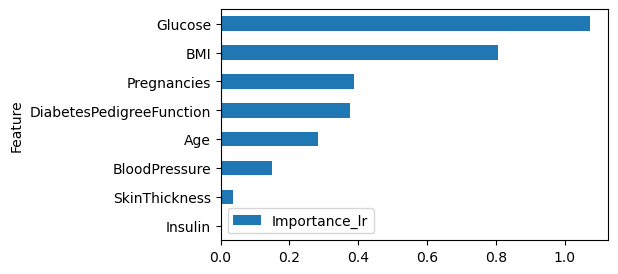

In [75]:
import numpy as np
coefficients = clf_lr.coef_
importance_lr = np.abs(coefficients)[0]
print(importance_lr)
feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Importance_lr': importance_lr})
feature_importance_lr = feature_importance_lr.sort_values('Importance_lr', ascending=True)
feature_importance_lr.plot(x='Feature', y='Importance_lr', kind='barh', figsize=(5, 3))

In [76]:
feature_importance_lr

,Feature,Importance_lr
4,Insulin,0.000465
3,SkinThickness,0.036150
2,BloodPressure,0.149817
7,Age,0.282671
6,DiabetesPedigreeFunction,0.377165
0,Pregnancies,0.388776
5,BMI,0.804934
1,Glucose,1.072227


Feature importance of the Logistic Regression.<br>
Compare absolute values of the coefficients as shown above. (in Logistics Regression).<br>
Similarly, create plots as below.

<Axes: ylabel='Feature'>

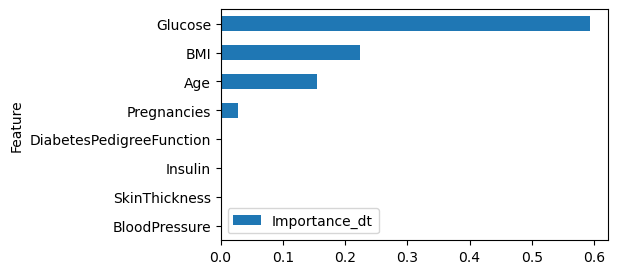

In [68]:
clf_dt.feature_importances_
feature_importance_dt = pd.DataFrame({'Feature': X.columns, 'Importance_dt': clf_dt.feature_importances_})
feature_importance_dt = feature_importance_dt.sort_values('Importance_dt', ascending=True)
feature_importance_dt.plot(x='Feature', y='Importance_dt', kind='barh', figsize=(5, 3))

In [79]:
feature_importance_dt

,Feature,Importance_dt
2,BloodPressure,0.000000
3,SkinThickness,0.000000
4,Insulin,0.000000
6,DiabetesPedigreeFunction,0.000000
0,Pregnancies,0.027072
7,Age,0.155572
5,BMI,0.224447
1,Glucose,0.592909


Feature importance of the Decision Tree.

<Axes: ylabel='Feature'>

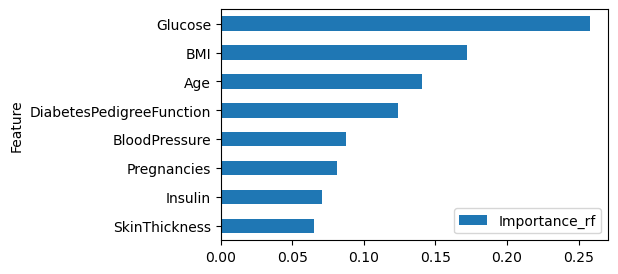

In [78]:
clf_rf.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance_rf': clf_rf.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values('Importance_rf', ascending=True)
feature_importance_rf.plot(x='Feature', y='Importance_rf', kind='barh', figsize=(5, 3))

In [80]:
feature_importance_rf

,Feature,Importance_rf
3,SkinThickness,0.065498
4,Insulin,0.070913
0,Pregnancies,0.081304
2,BloodPressure,0.087852
6,DiabetesPedigreeFunction,0.124190
7,Age,0.140392
5,BMI,0.172095
1,Glucose,0.257756


## Problem 4. Check model performance on new data (test performance)

Today, 70 new patients arrived in our hospital, so you want to check your model performance on new samples.
The labels of new instances were obtained by diagnosis of experienced doctors.

The test data named `diabetes_test.csv` is located in the same forder.

In [50]:
df_test = pd.read_csv('diabetes_test.csv')
df_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,99,60,17,160,36.6,0.453,21,0
1,1,102,74,0,0,39.5,0.293,42,1
2,11,120,80,37,150,42.3,0.785,48,1
3,3,102,44,20,94,30.8,0.400,26,0
4,1,109,58,18,116,28.5,0.219,22,0
...,...,...,...,...,...,...,...,...,...
65,0,134,58,20,291,26.4,0.352,21,0
66,3,102,74,0,0,29.5,0.121,32,0
67,7,187,50,33,392,33.9,0.826,34,1
68,3,173,78,39,185,33.8,0.970,31,1


Define `X` and `y` of test data.

In [51]:
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

Test your classifiers on the test data and draw a plot containing ROC curves and AUC scores of the models obtained in the Problem 2.
* (warning) Don't forget normalization using `scaler` before inputting your data into the model. Or, your results may be not good...
* Use `plt.savefig('roc.png')` to save the plot to the file named `roc.png`.

In [57]:
X_test_norm = scaler.transform(X_test)

In [58]:
y_test_pred = clf_dt.predict(X_test_norm)
print('Evaluation on Validation Set with Decision Tree:')
evaluate(y_test, y_test_pred)

y_test_pred = clf_rf.predict(X_test_norm)
print('Evaluation on Validation Set with Random Forest:')
evaluate(y_test, y_test_pred)

y_test_pred = clf_lr.predict(X_test_norm)
print('Evaluation on Validation Set with Logistic Regression:')
evaluate(y_test, y_test_pred)

print('trainining finished.')

Evaluation on Validation Set with Decision Tree:
Accuracy: 75.71%
Precision: 81.25%
Recall: 48.15%
Fscore: 60.47%
Evaluation on Validation Set with Random Forest:
Accuracy: 74.29%
Precision: 73.68%
Recall: 51.85%
Fscore: 60.87%
Evaluation on Validation Set with Logistic Regression:
Accuracy: 78.57%
Precision: 83.33%
Recall: 55.56%
Fscore: 66.67%
trainining finished.


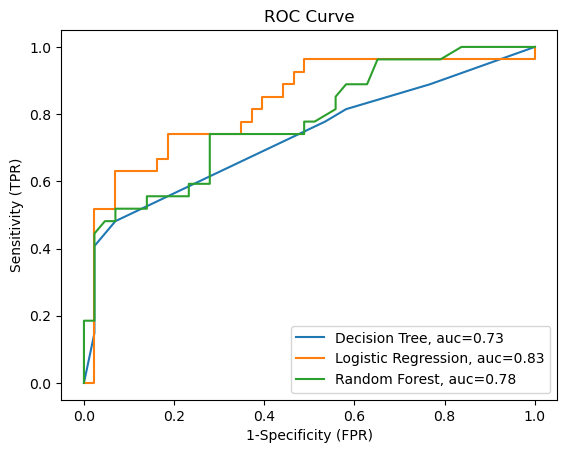

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

for clf, name in zip([clf_dt, clf_lr, clf_rf], 
                     ['Decision Tree', 'Logistic Regression', 'Random Forest']):
    y_test_pred_proba = clf.predict_proba(X_test_norm)[:, 1] # probability score of positive class
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred_proba) # get fpr and tpr arrays
    auc = roc_auc_score(y_test, y_test_pred_proba) # get auc
    plt.plot(fpr, tpr, label="{}, auc={:.2f}".format(name, auc))

plt.legend(loc=4)
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curve')
plt.savefig('roc.png')
plt.show()